In [3]:
#1.Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier


In [5]:
# Load student dataset
df = pd.read_csv(r"C:\Users\Admin\Downloads\archive (2)\customer_churn_dataset.csv")
df.head()


,Customer_ID,Age,Gender,Monthly_Spending,Subscription_Length,Support_Interactions,Churn
0,1,56,0,275,2,3,0
1,2,69,0,381,8,1,0
2,3,46,1,219,5,2,0
3,4,32,1,58,2,2,0
4,5,60,1,89,4,4,0


In [7]:
#check the shape of the dataset
print(df.shape)

(1000, 7)


In [8]:
#brief information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Customer_ID           1000 non-null   int64
 1   Age                   1000 non-null   int64
 2   Gender                1000 non-null   int64
 3   Monthly_Spending      1000 non-null   int64
 4   Subscription_Length   1000 non-null   int64
 5   Support_Interactions  1000 non-null   int64
 6   Churn                 1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


In [9]:
#print summary statistics of the data including the categorical columns
df.describe(include='all')

,Customer_ID,Age,Gender,Monthly_Spending,Subscription_Length,Support_Interactions,Churn
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,44.385000,0.476000,275.791000,4.973000,1.959000,0.242000
std,288.819436,15.321669,0.499674,131.061193,2.555152,1.435053,0.428509
min,1.000000,18.000000,0.000000,50.000000,1.000000,0.000000,0.000000
25%,250.750000,31.750000,0.000000,166.000000,3.000000,1.000000,0.000000
50%,500.500000,45.000000,0.000000,278.000000,5.000000,2.000000,0.000000
75%,750.250000,57.000000,1.000000,387.250000,7.000000,3.000000,0.000000
max,1000.000000,70.000000,1.000000,500.000000,9.000000,4.000000,1.000000


In [10]:
# Count churn labels
churn_counts = df['Churn'].value_counts()
print("Churn Distribution:")
print(churn_counts)

Churn Distribution:
Churn
0    758
1    242
Name: count, dtype: int64


In [12]:
#churn: high income but low spending score
df['churn'] = ((df['annual_income_k$'] > 80) & (df['spending_score'] < 40)).astype(int)
df.head(100)


KeyError: 'annual_income_k$'

In [14]:
# Count churn labels
churn_counts = df['Churn'].value_counts()
print("Churn Distribution:")
print(churn_counts)

Churn Distribution:
Churn
0    758
1    242
Name: count, dtype: int64


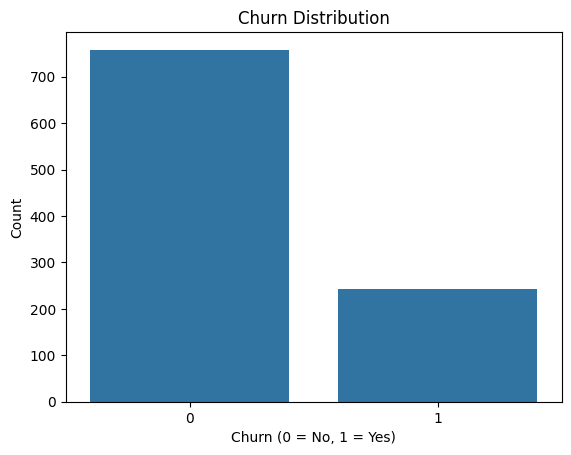

In [15]:
# 📊 Plot the number of churned vs non-churned customers
sns.countplot(x='Churn', data=df)

# 🏷️ Add labels and title
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")

# 📐 Display the plot
plt.show()


In [18]:
# 4. Preprocessing
from sklearn.preprocessing import LabelEncoder
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])  # Female=0, Male=1


In [28]:
feature_columns = list(X.columns)


In [29]:
features = ["Age", "Gender", "Monthly_Spending", "Subscription_Length", "Support_Interactions"]
X = df[features]
y = df["Churn"]


In [30]:
# 5. Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [31]:
#Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [32]:
#Random Forest Model
model = RandomForestClassifier(n_estimators=150, random_state=42)
model.fit(X_train, y_train)


,n_estimators,150
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [33]:
#Predict metrics
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.76

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.96      0.86       152
           1       0.50      0.12      0.20        48

    accuracy                           0.76       200
   macro avg       0.64      0.54      0.53       200
weighted avg       0.71      0.76      0.70       200



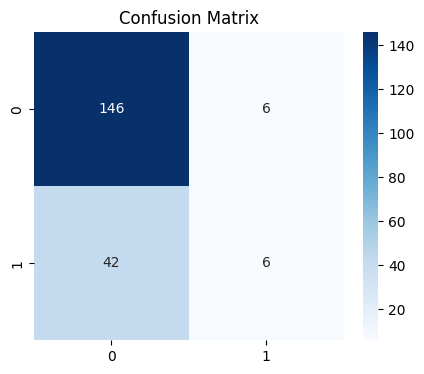

In [34]:
#confusion matrics
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


In [35]:
# Extract feature importances from trained Random Forest model
importances = model.feature_importances_

# Create a DataFrame to rank features
feature_scores = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Display top features
feature_scores.head(15)

,Feature,Importance
2,Monthly_Spending,0.387955
0,Age,0.308006
3,Subscription_Length,0.154311
4,Support_Interactions,0.104347
1,Gender,0.045381


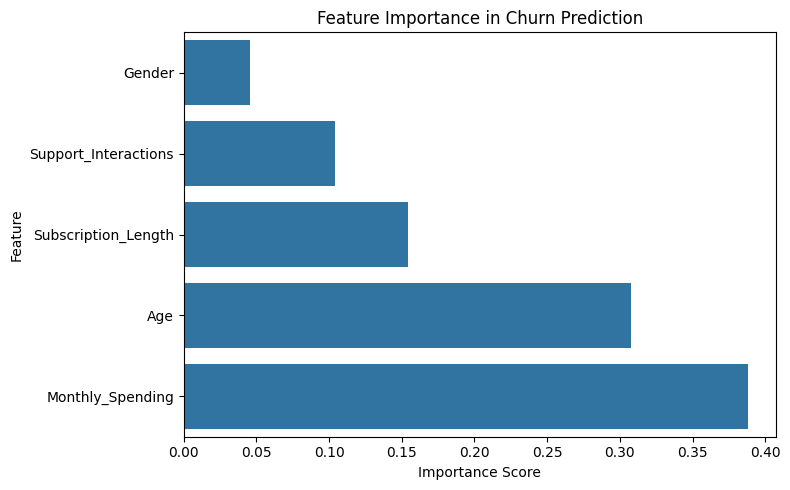

In [36]:
# DataFrame for plotting
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=True)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance in Churn Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [37]:
import joblib
joblib.dump(model, "model.pkl")
joblib.dump(feature_columns, "columns.pkl")

print("\n✅ model.pkl saved")
print("✅ columns.pkl saved")



✅ model.pkl saved
✅ columns.pkl saved


In [38]:
import os
print(os.getcwd())


C:\Users\Admin


In [39]:
import os
print(os.listdir())


['.anaconda', '.cache', '.conda', '.condarc', '.config', '.continuum', '.firebase', '.firebaserc', '.gitignore', '.ipynb_checkpoints', '.ipython', '.jupyter', '.kaggle', '.matplotlib', '.ms-ad', '.node_repl_history', '.spyder-py3', '.vscode', '2.html', '4.html', '5.html', 'anaconda3', 'anaconda_projects', 'Analysis.ipynb', 'anothernew.html', 'api', 'AppData', 'Application Data', 'backend', 'best.html', 'carbonmind', 'cd', 'CO2 Emission.ipynb', 'coffe-sales.ipynb', 'columns.pkl', 'Contacts', 'Cookies', 'customer churn .ipynb', 'dash.html', 'dashboard.html', 'DASS.html', 'Desktop', 'Documents', 'Downloads', 'e-learning app', 'Favorites', 'file.html', 'firebase-debug.log', 'firebase.json', 'firestore.indexes.json', 'firestore.rules', 'functions', 'glamourlytics', 'glamourlytics.html', 'glomour.html', 'hr-connect', 'index.html', 'IntelGraphicsProfiles', 'javascript', 'Links', 'Local Settings', 'masai.html', 'model.pkl', 'Music', 'My Documents', 'NetHood', 'new dashboard html.html', 'new.ht